In [1]:
import numpy as np
import xgboost as xgb
from sklearn import datasets
from matplotlib import pylab as plt 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, mean_squared_error
from seqmm import SeqUD, SeqRand, GPEIOPT, SMACOPT, TPEOPT,\
                    GridSearch, RandSearch, LHSSearch, SobolSearch, UDSearch

dt = datasets.load_diabetes()
sx = MinMaxScaler()
sy = MinMaxScaler()
x = sx.fit_transform(dt.data)
y = sy.fit_transform(dt.target.reshape([-1,1]))

ParaSpace = {'booster':          {'Type': 'categorical', 'Mapping': ['gbtree', 'gblinear']},
             'max_depth':        {'Type': 'integer',     'Mapping': np.linspace(2,8,7)}, 
             'n_estimators':     {'Type': 'integer',     'Mapping': np.linspace(100,300,201)},
             'min_child_weight': {'Type': 'integer',     'Mapping': np.linspace(1,100,100)},
             'subsample':        {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'colsample_bytree': {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'learning_rate':    {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'gamma':            {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'reg_lambda':       {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'reg_alpha':         {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x}}

estimator = xgb.XGBRegressor()
score_metric = make_scorer(mean_squared_error, False)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

seq_model_zoo = {"SeqUD": SeqUD, 
                 "SeqRand": SeqRand,
                  "GPEI": GPEIOPT, 
                  "SMAC": SMACOPT, 
                  "TPE": TPEOPT}
for item, model in seq_model_zoo.items():
    print("Fitting model: %s"% item)
    clf = model(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, scoring =  score_metric, refit = True, verbose = False)
    clf.fit(x, y)
    print("The best score is %0.5f: ,time cost: %0.2f:"% (clf.best_score_,clf.search_time_consumed_))
    plt.plot(clf.logs["score"].cummax()) 
plt.legend(seq_model_zoo.keys())

Fitting model: SeqUD
The best score is -0.02885: ,time cost: 121.66:
Fitting model: SeqRand
The best score is -0.02894: ,time cost: 25.59:
Fitting model: GPEI
Time Out, Spearmint Early Stop!
The best score is -0.02889: ,time cost: 313.10:
Fitting model: SMAC
The best score is -0.02909: ,time cost: 417.41:
Fitting model: TPE
The best score is -0.02884: ,time cost: 39.74:


Fitting model: Grid
The best score is -0.03460: ,time cost: 17.12:
Fitting model: Rand


AttributeError: module 'numpy' has no attribute 'rand'

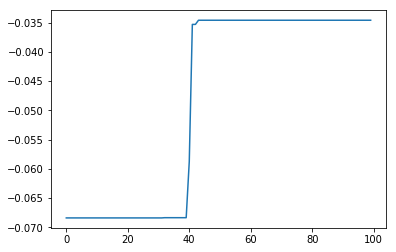

In [2]:
batch_model_zoo = {"Grid": GridSearch,
                  "Rand": RandSearch, 
                  "LHS": LHSSearch, 
                  "Sobol": SobolSearch, 
                  "UD": UDSearch}
for item, model in batch_model_zoo.items():
    print("Fitting model: %s"% item)
    clf = model(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, scoring =  score_metric, refit = True, verbose = False)
    clf.fit(x, y)
    print("The best score is %0.5f: ,time cost: %0.2f:"% (clf.best_score_,clf.search_time_consumed_))
    plt.plot(clf.logs["score"].cummax()) 
plt.legend(batch_model_zoo.keys())